In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nba_api.stats.static import players

In [168]:
df = pd.read_csv("test_final.csv")
df = df.drop(["Unnamed: 0", "TEAM_NAME", "TEAM_NAME_2", "GAME_ID", "day_in_month_y", "day_in_week_y", "GAME_DATE", "MATCHUP_x", "MATCHUP_y", "SEASON_ID"], axis=1)
df.tail()

,WL,TEAM_ID,TEAM_ID_2,W_x,L_x,W_PCT_x,day_in_month_x,day_in_week_x,W_y,L_y,...,player_id_0,player_id_1,player_id_2,player_id_3,player_id_4,player_id_5,player_id_6,player_id_7,player_id_8,player_id_9
218,H,1610612752,1610612743,7.0,7.0,0.500,16,3,9.0,4.0,...,1629628,203944,1628392,1629629,1628973,1629008,201145,201599,203484,1627750
219,A,1610612744,1610612756,6.0,8.0,0.429,16,3,8.0,5.0,...,203952,203110,1626172,202691,201939,1628969,1628470,1629028,1626164,1626166
220,A,1610612759,1610612758,6.0,9.0,0.400,17,4,7.0,6.0,...,1628966,1631110,1627751,1630200,1630170,1628989,203084,1627734,1629056,1628368
221,A,1610612757,1610612751,10.0,4.0,0.714,17,4,6.0,9.0,...,1628404,203924,203994,1629014,203081,201142,1626220,1629651,203925,1628410
222,H,1610612746,1610612765,8.0,7.0,0.533,17,4,3.0,12.0,...,202695,202694,1627826,202331,202704,1630180,202711,1628963,1631093,1630165


In [44]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WL              5 non-null      object 
 1   TEAM_ID         5 non-null      int64  
 2   TEAM_ID_2       5 non-null      int64  
 3   W_x             5 non-null      float64
 4   L_x             5 non-null      float64
 5   W_PCT_x         5 non-null      float64
 6   day_in_month_x  5 non-null      int64  
 7   day_in_week_x   5 non-null      int64  
 8   W_y             5 non-null      float64
 9   L_y             5 non-null      float64
 10  W_PCT_y         5 non-null      float64
 11  player_id_0     5 non-null      int64  
 12  player_id_1     5 non-null      int64  
 13  player_id_2     5 non-null      int64  
 14  player_id_3     5 non-null      int64  
 15  player_id_4     5 non-null      int64  
 16  player_id_5     5 non-null      int64  
 17  player_id_6     5 non-null      int64  

In [169]:
def reset(row):
    if row["WL"] == "H":
        row["H"] = 1
        row["A"] = 0
    else:
        row["H"] = 0
        row["A"] = 1
    return row
    
df = df.apply(reset, axis=1)

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.columns

Index(['WL', 'TEAM_ID', 'TEAM_ID_2', 'W_x', 'L_x', 'W_PCT_x', 'day_in_month_x',
       'day_in_week_x', 'W_y', 'L_y', 'W_PCT_y', 'player_id_0', 'player_id_1',
       'player_id_2', 'player_id_3', 'player_id_4', 'player_id_5',
       'player_id_6', 'player_id_7', 'player_id_8', 'player_id_9'],
      dtype='object')

## Numerikus adatok konvertálása kategorikussá

In [148]:
df['TEAM_ID'] = pd.Categorical(df.TEAM_ID)
df['TEAM_ID_2'] = pd.Categorical(df.TEAM_ID_2)
df['player_id_0'] = pd.Categorical(df.player_id_0)
df['player_id_1'] = pd.Categorical(df.player_id_1)
df['player_id_2'] = pd.Categorical(df.player_id_2)
df['player_id_3'] = pd.Categorical(df.player_id_3)
df['player_id_4'] = pd.Categorical(df.player_id_4)
df['player_id_5'] = pd.Categorical(df.player_id_5)
df['player_id_6'] = pd.Categorical(df.player_id_6)
df['player_id_7'] = pd.Categorical(df.player_id_7)
df['player_id_8'] = pd.Categorical(df.player_id_8)
df['player_id_9'] = pd.Categorical(df.player_id_9)

## ~~ki kell tölteni a hiányzó adatokat~~
* ~~a position oszlopokban ha van érték akkor legyen 1, ha nincs akkor 0~~
* ~~player oszlopban ha nincs érték akkor legyen nulla~~

## korrelációs táblázat
* kiemelni a pozitív és negatív korrelációkat
* korrelációkat megjeleníteni plottal, hogy látni lehessen hogy viszonyulnak egymáshoz
* minél több összefüggési kérdést megvizsgálni

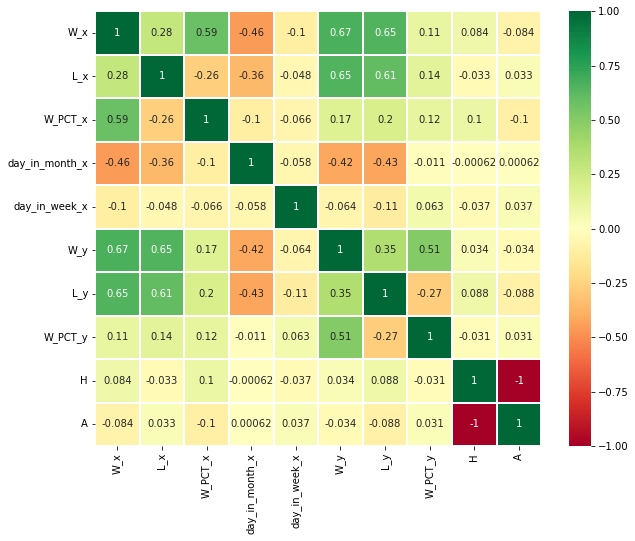

In [149]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [209]:
players_win = df.groupby('player_id_0')[['H']].sum().reset_index()
players_win.columns = ["player_id", "Wins"]
for i in range(1,10):
    if i < 5:
        player_win = df.groupby(f'player_id_{i}')[['H']].sum().reset_index()
    else:
        player_win = df.groupby(f'player_id_{i}')[['A']].sum().reset_index()

    player_win.columns = ["player_id", "Wins"]
    players_win = pd.concat([players_win, player_win])

players_win.reset_index(drop=True)
players_win = players_win.groupby('player_id')[['Wins']].sum().reset_index()
players_win

,player_id,Wins
0,2544,2
1,101108,7
2,200768,7
3,200782,7
4,201142,7
...,...,...
238,1631103,0
239,1631107,0
240,1631110,5
241,1631114,1


In [179]:
# df.groupby(f'player_id_0')[['WL']].sum().reset_index().sort_values("player_id_0")
df.groupby('player_id_0')[['H']].sum().reset_index()

,player_id_0,H
0,201142,3
1,201569,2
2,201935,1
3,201942,2
4,202330,0
...,...,...
59,1630532,0
60,1630537,1
61,1630598,2
62,1630699,1


In [210]:
players.find_player_by_id(2544)

{'id': 2544,
 'full_name': 'LeBron James',
 'first_name': 'LeBron',
 'last_name': 'James',
 'is_active': True}